## Libraries

In [15]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

from sklearn.linear_model import LogisticRegression 

import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Data Preparation

In [34]:
df_purchase = pd.read_csv('C:\\Users\\akhan\\Desktop\\datasets\\purchase data.csv')
df_price_elasticities = pd.read_csv('C:\\Users\\akhan\\Desktop\\datasets\\df_price_elasticities.csv')
scaler = pickle.load(open('scaler.pickle', 'rb'))
pca = pickle.load(open('pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

## Price Elasticity of Purchase Quantity

In [17]:
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,0,1,0,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,0,1,0,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,0,1,0,0,0


In [18]:
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Segment,Segment_0,Segment_1,Segment_2,Segment_3,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,1.341235,0.294303,0.300314,0.175229,0.230154,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,1.128625,0.455744,0.458410,0.380176,0.420946,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df_purchase_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'], dtype=object)

In [20]:
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )

In [21]:
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

#### Note: 
price and promotion are only important when the item is actually purchased. we consider this by multipling the price and promotion.

## Model Estimation. Linear Regression

In [22]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
pd.options.display.max_rows = 100
X

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0
...,...,...
58621,1.89,0
58648,1.35,1
58674,1.85,1
58687,1.51,0


In [23]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [25]:
model_quantity = LinearRegression()
model_quantity.fit(X, Y)

LinearRegression()

In [26]:
model_quantity.coef_

array([-0.8173651 , -0.10504673])

## Price Elasticity Estimation

#### 1) with promition (promotion = 1)

In [28]:
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [29]:
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [30]:
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.8173651016685002

In [31]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [32]:
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [35]:
df_price_elasticities['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities

,Unnamed: 0,Unnamed: 0.1,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,...,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1
0,0,0,0.50,-0.096380,-0.032264,-0.119831,-0.211177,-0.179886,-0.125722,-0.195637,...,-0.115839,0.174120,-0.039242,0.196467,-0.001038,0.172839,0.332011,-0.298418,0.482873,-0.102157
1,1,1,0.51,-0.100447,-0.034094,-0.124052,-0.217747,-0.185483,-0.129838,-0.201758,...,-0.118878,0.176175,-0.040244,0.198962,-0.001100,0.175110,0.337288,-0.304476,0.492185,-0.104413
2,2,2,0.52,-0.104642,-0.036013,-0.128369,-0.224425,-0.191171,-0.134032,-0.207981,...,-0.121952,0.178180,-0.041255,0.201406,-0.001165,0.177337,0.342507,-0.310544,0.501481,-0.106679
3,3,3,0.53,-0.108966,-0.038026,-0.132782,-0.231212,-0.196952,-0.138307,-0.214308,...,-0.125061,0.180133,-0.042277,0.203798,-0.001233,0.179520,0.347669,-0.316623,0.510761,-0.108954
4,4,4,0.54,-0.113424,-0.040135,-0.137292,-0.238108,-0.202826,-0.142662,-0.220739,...,-0.128206,0.182037,-0.043308,0.206138,-0.001305,0.181660,0.352773,-0.322712,0.520026,-0.111238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,295,3.45,-8.013537,-12.414835,-5.727156,-5.051717,-4.303179,-4.861341,-4.982984,...,-3.592454,0.024051,-1.319098,0.068693,-3.746052,0.028513,0.162233,-3.331943,0.153513,-1.774292
296,296,296,3.46,-8.038789,-12.451404,-5.747383,-5.068573,-4.317538,-4.879542,-4.999890,...,-3.606358,0.023695,-1.329302,0.068079,-3.757494,0.027983,0.160333,-3.345272,0.148202,-1.788634
297,297,297,3.47,-8.064006,-12.487955,-5.767572,-5.085411,-4.331880,-4.897713,-5.016776,...,-3.620219,0.023343,-1.339562,0.067469,-3.768915,0.027461,0.158447,-3.358598,0.143055,-1.803124
298,298,298,3.48,-8.089189,-12.524490,-5.787725,-5.102229,-4.346207,-4.915854,-5.033642,...,-3.634035,0.022996,-1.349878,0.066864,-3.780317,0.026947,0.156576,-3.371921,0.138066,-1.817766


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

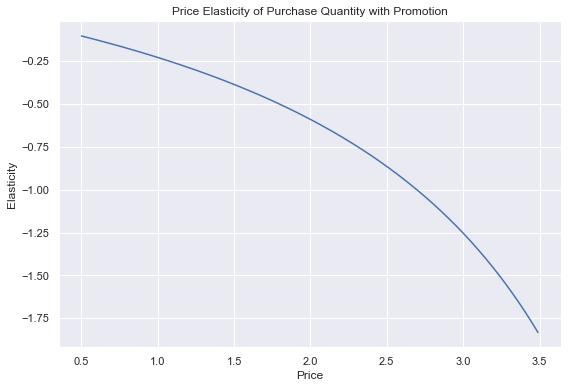

In [36]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

#### Analysis:
With increasing the price the quantity of purchase deceases as in the graph. However, customers are quite in the inelastic area (absolute elasticity of 1) up to price $2.7.

#### 2) without promition (promotion = 0)


In [38]:
df_price_elasticity_quantity['Promotion_Incidence'] = 0

predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity

df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities

,Unnamed: 0,Unnamed: 0.1,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,...,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0,0,0.50,-0.096380,-0.032264,-0.119831,-0.211177,-0.179886,-0.125722,-0.195637,...,0.174120,-0.039242,0.196467,-0.001038,0.172839,0.332011,-0.298418,0.482873,-0.102157,-0.099543
1,1,1,0.51,-0.100447,-0.034094,-0.124052,-0.217747,-0.185483,-0.129838,-0.201758,...,0.176175,-0.040244,0.198962,-0.001100,0.175110,0.337288,-0.304476,0.492185,-0.104413,-0.101736
2,2,2,0.52,-0.104642,-0.036013,-0.128369,-0.224425,-0.191171,-0.134032,-0.207981,...,0.178180,-0.041255,0.201406,-0.001165,0.177337,0.342507,-0.310544,0.501481,-0.106679,-0.103939
3,3,3,0.53,-0.108966,-0.038026,-0.132782,-0.231212,-0.196952,-0.138307,-0.214308,...,0.180133,-0.042277,0.203798,-0.001233,0.179520,0.347669,-0.316623,0.510761,-0.108954,-0.106150
4,4,4,0.54,-0.113424,-0.040135,-0.137292,-0.238108,-0.202826,-0.142662,-0.220739,...,0.182037,-0.043308,0.206138,-0.001305,0.181660,0.352773,-0.322712,0.520026,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,295,3.45,-8.013537,-12.414835,-5.727156,-5.051717,-4.303179,-4.861341,-4.982984,...,0.024051,-1.319098,0.068693,-3.746052,0.028513,0.162233,-3.331943,0.153513,-1.774292,-1.664290
296,296,296,3.46,-8.038789,-12.451404,-5.747383,-5.068573,-4.317538,-4.879542,-4.999890,...,0.023695,-1.329302,0.068079,-3.757494,0.027983,0.160333,-3.345272,0.148202,-1.788634,-1.677205
297,297,297,3.47,-8.064006,-12.487955,-5.767572,-5.085411,-4.331880,-4.897713,-5.016776,...,0.023343,-1.339562,0.067469,-3.768915,0.027461,0.158447,-3.358598,0.143055,-1.803124,-1.690246
298,298,298,3.48,-8.089189,-12.524490,-5.787725,-5.102229,-4.346207,-4.915854,-5.033642,...,0.022996,-1.349878,0.066864,-3.780317,0.026947,0.156576,-3.371921,0.138066,-1.817766,-1.703414


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

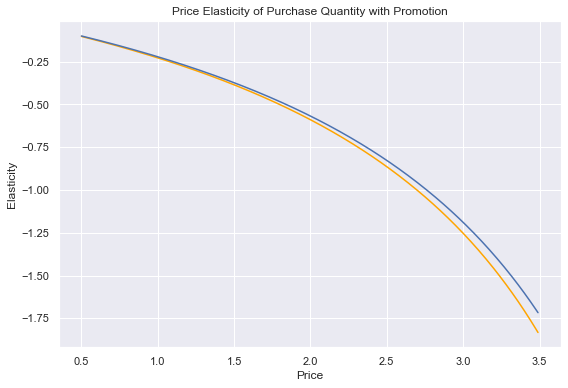

In [39]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')